<a href="https://colab.research.google.com/github/Abubacker10/Deep-Learning-Lab/blob/main/Image_Classification_with_Digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.utils import to_categorical


In [ ]:
df = load_digits().images
df.shape
target = load_digits().target
target.shape,
df[0],
target[0]

0

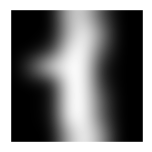

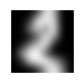

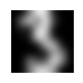

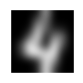

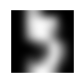

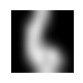

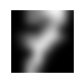

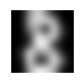

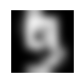

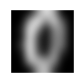

In [ ]:
s = 1
plt.figure(figsize = (10, 10))
for i in range(10):
    plt.subplot(5, 2, s)
    plt.imshow(df[s], cmap = 'gray', interpolation = 'bicubic')
    plt.xticks([])
    plt.yticks([])
    s += 1
    plt.show()


In [ ]:

classes = [0,1,2,3,4,5,6,7,8,9] # classfication

X = df #Split the data from train to test
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = 42)
w,h = df[0].shape
X_train = X_train.reshape(X_train.shape[0], w*h)
X_test = X_test.reshape(X_test.shape[0], w*h)
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)


In [ ]:
def Prediction_cat(model,image): #Function for models
  global w,h
  pred = model.predict(image)
  color = ["red"]*10
  num = pred.argmax()
  color[num] = "blue"
  plt.figure(figsize = (10, 4))
  plt.subplot(1,2,1)
  plt.imshow(image.reshape(w,h), cmap = 'gray', interpolation = 'bicubic')
  plt.xticks([])
  plt.yticks([])
  plt.title('Image')

  plt.subplot(1,2,2)
  plt.bar(x = [0,1,2,3,4,5,6,7,8,9], height = pred.flatten(), color = color)
  plt.xlabel("Digits")
  plt.ylabel("Probability")
  plt.title("Prediction")
  plt.xticks([0,1,2,3,4,5,6,7,8,9])
  plt.show()


In [ ]:
model = Sequential() #Building the Model
model.add(Dense(64, input_shape = X_train[0].shape, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 21386 (83.54 KB)
Trainable params: 21386 (83.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Epoch 1/20
33/33 [==============================] - 6s 27ms/step - loss: 1.7127 - accuracy: 0.4967 - val_loss: 0.5744 - val_accuracy: 0.8205
Epoch 2/20
33/33 [==============================] - 0s 4ms/step - loss: 0.4229 - accuracy: 0.8763 - val_loss: 0.1905 - val_accuracy: 0.9658
Epoch 3/20
33/33 [==============================] - 0s 4ms/step - loss: 0.2167 - accuracy: 0.9410 - val_loss: 0.1251 - val_accuracy: 0.9744
Epoch 4/20
33/33 [==============================] - 0s 4ms/step - loss: 0.1299 - accuracy: 0.9676 - val_loss: 0.0803 - val_accuracy: 0.9744
Epoch 5/20
33/33 [==============================] - 0s 4ms/step - loss: 0.0748 - accuracy: 0.9829 - val_loss: 0.0611 - val_accuracy: 0.9658
Epoch 6/20
33/33 [==============================] - 0s 4ms/step - loss: 0.0405 - accuracy: 0.9962 - val_loss: 0.0486 - val_accuracy: 0.9915
Epoch 7/20
33/33 [==============================] - 0s 5ms/step - loss: 0.0283 - accuracy: 0.9981 - val_loss: 0.0526 - val_accuracy: 0.9829
Epoch 8/20
33/33 [=

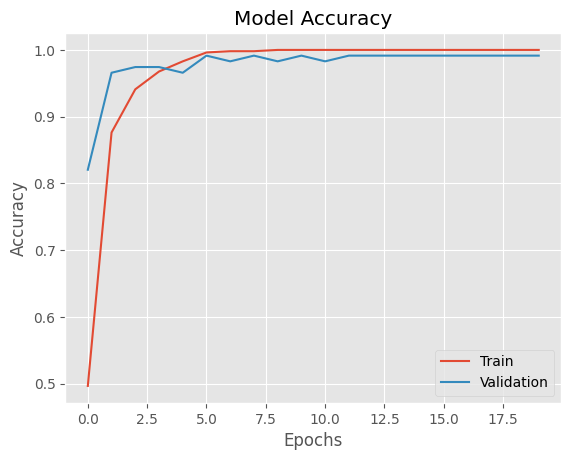

1/1 [==============================] - 0s 111ms/step


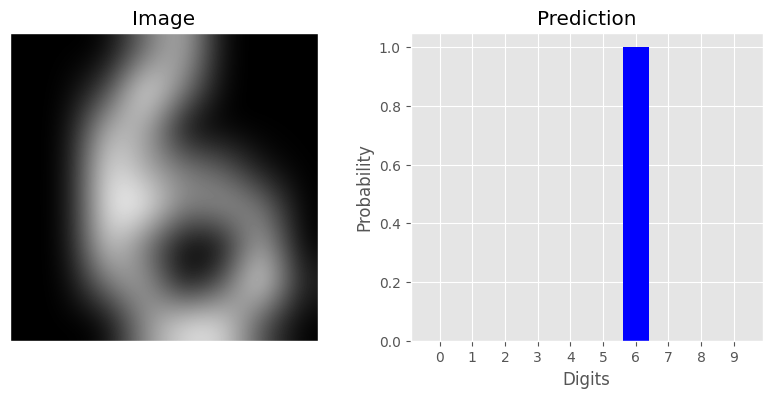

1/1 [==============================] - 0s 20ms/step


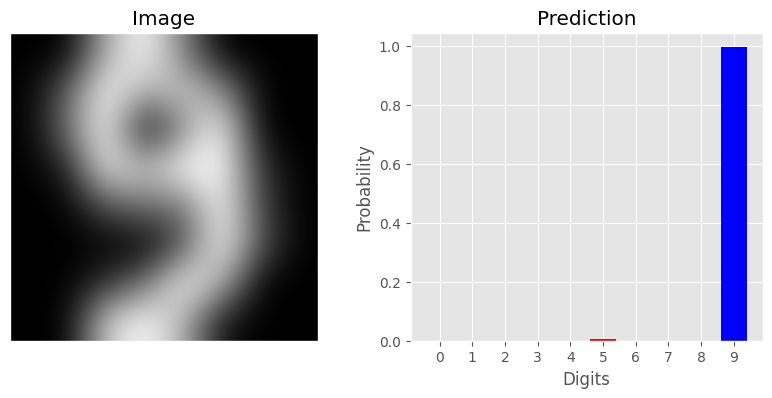

1/1 [==============================] - 0s 22ms/step


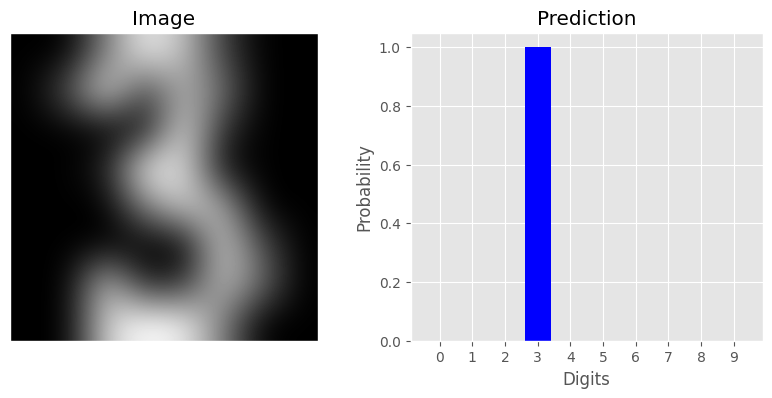

1/1 [==============================] - 0s 22ms/step


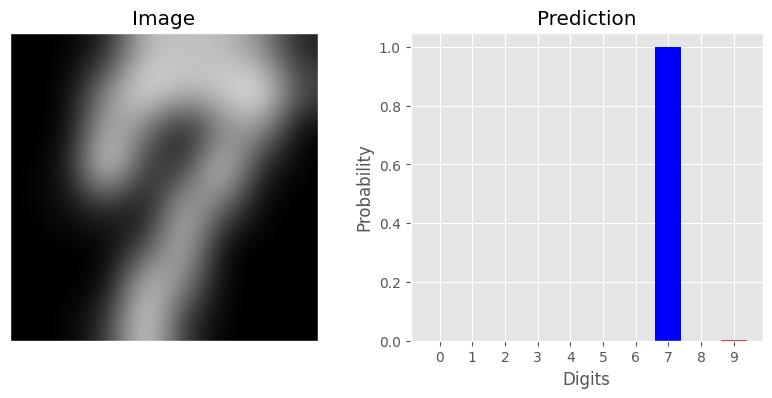

1/1 [==============================] - 0s 34ms/step


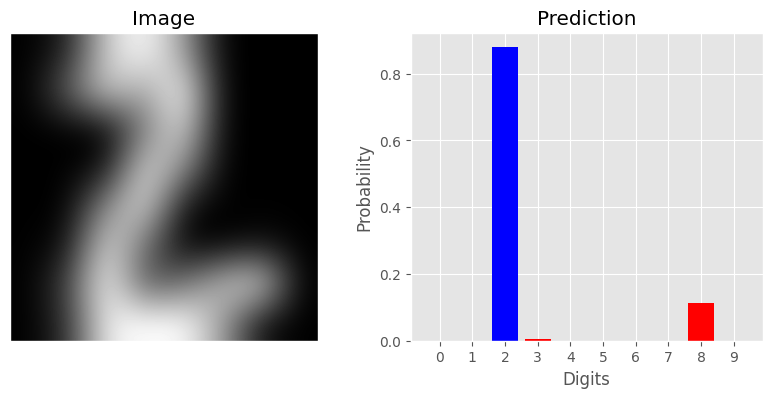

In [ ]:
history = model.fit(X_train, y_train_cat, epochs = 20, batch_size = 32, validation_split = 0.1) #Training the model




result  = model.evaluate(X_test.reshape(629,64),y_test_cat)
for i in range(len(model.metrics_names)):
  print(model.metrics_names[i],":",result[i])
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["Train","Validation"])
plt.show()
for i in range(5):
  Prediction_cat(model,X_test[i].reshape(1,-1))